# Práctica 1: Regresión lineal

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

### Imports

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pandas.io.parsers import read_csv

### Carga de los datos

In [102]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

## Parte 1: Regresión lineal con una variable

## Solución iterativa

In [103]:
# Hipótesis h0(x)
def fun_hipotesis(x, thetas):
    return thetas[0] + thetas[1] * x

In [104]:
# Calcula el descenso de gradiente
def descenso_gradiente(X, Y, m, alpha, num_iteraciones=1500):
    
    thetas = [0, 0]

    # Iteraciones para minimizar el coste
    for _ in range(num_iteraciones):
        
        sum_0 = sum_1 = 0
        
        for i in range(m):            
            sum_0 += fun_hipotesis(X[i], thetas) - Y[i]
            sum_1 += (fun_hipotesis(X[i], thetas) - Y[i]) * X[i]
        
        # Actualizamos valores de theta0 y theta1        
        thetas[0] = thetas[0] - (alpha / m) * sum_0
        thetas[1] = thetas[1] - (alpha / m) * sum_1
    
    # Dibuja la gráfica
    plt.plot(X, Y, "x",c='red')
    
    min_x = min(X)
    max_x = max (X)
    
    min_y = thetas[0] + thetas[1] * min_x
    max_y = thetas[0] + thetas[1] * max_x
    
    plt.plot([min_x, max_x], [min_y, max_y])
    
    #plt.savefig("resultado.pdf")
    #plt.figure()
    
    return thetas

In [105]:
# Función de coste total
def fun_coste(X, Y, m, thetas):
    sumatorio = 0
    for i in range(len(X)): # len(x) y m no es lo mismo?
        sumatorio += (fun_hipotesis(X[i], thetas) - Y[i])**2
    return (sumatorio / (2*m))

In [106]:
# Genera las rejillas para las gráficas
def make_data(X, Y):
    
    step = 0.1
    Theta0 = np.arange(-10, 10, step)
    Theta1 = np.arange(-1, 4, step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

    Coste = np.empty_like(Theta0)

    for i in range(len(Theta0)):
        for j in range(len(Theta0[i])):
            Coste[i][j] = fun_coste(X, Y, m, [Theta0[i, j], Theta1[i, j]])
            
    return Theta0, Theta1, Coste

In [107]:
# Dibuja la función de coste 3D
def dibuja_coste(Theta0, Theta1, Coste):
    
    # Pinta la gráfica
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(-Theta1, Theta0, Coste, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [108]:
# Dibuja la función de coste con una gráfica de contorno
def dibuja_contorno(Theta0, Theta1, Coste, thetas):
    plt.contour(Theta0, Theta1, Coste, np.logspace(-2, 3, 20), colors='blue')
    plt.plot(thetas[0],thetas[1],'x', color = 'red')

### Observando resultados

In [109]:
# Carga de los datos
datos = carga_csv('ex1data1.csv')

alpha = 0.01

X = datos[:, 0]
Y = datos [:, 1]

# Número filas y columnas
m = (len(X))
n = 2

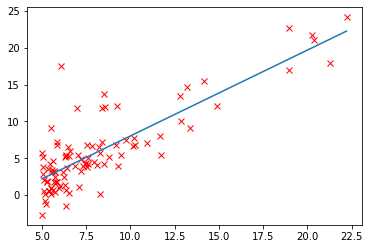

In [110]:
# Aplicamos descenso de gradiente
thetas = descenso_gradiente(X, Y, m, alpha, 1500)

In [111]:
# Observamos los valores theta0, theta1 y su coste
print("thetas[0]: " + str(thetas[0]))
print("thetas[1]: " + str(thetas[1]))
coste = fun_coste(X, Y, m, thetas)
print("Coste: ", coste)

thetas[0]: -3.63029143940436
thetas[1]: 1.166362350335582
Coste:  4.483388256587727


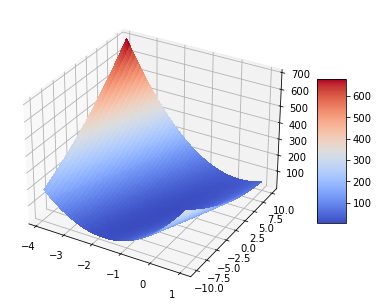

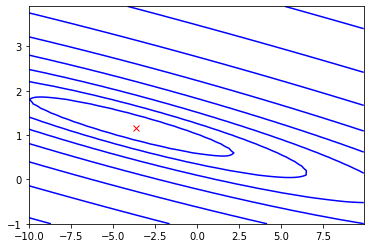

In [112]:
# Dibujamos la función de coste con un gráfico 3D y otro de rejilla
Theta0, Theta1, Coste = make_data(X, Y)

dibuja_coste(Theta0, Theta1, Coste)
dibuja_contorno(Theta0, Theta1, Coste, thetas)

## Solución vectorizada

In [113]:
# Calcula el descenso de gradiente
def descenso_gradiente_vec(X, Y, alpha, m, n, numinteraciones = 1500):
    Theta = np.zeros(n)
    
    for _ in range(numinteraciones):
        
        # NuevaTheta = Theta
        H = np.dot(X, Theta)
        Aux = (H - Y)
        
        for i in range(n):
            Aux_i = Aux * X[:, i]
            Theta[i] -= (alpha / m) * Aux_i.sum()
    
    # Elimino la fila de unos
    X = np.delete(X, 0, 1)
    
    # Dibuja la gráfica
    plt.plot(X, Y, "x",c='red')
    
    min_x = np.min(X)
    max_x = np.max(X)
    
    min_y = thetas[0] + thetas[1] * min_x
    max_y = thetas[0] + thetas[1] * max_x
    
    plt.plot([min_x, max_x], [min_y, max_y])        
    
    return Theta

In [114]:
# Función de coste total
def fun_coste_vec(X, Y, Theta):
    H = np.dot(X,Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))

In [115]:
# Genera las rejillas para las gráficas
def make_data_vec(t0_range, t1_range, X, Y):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    Coste = np.empty_like(Theta0)
    
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = fun_coste_vec(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    
    return Theta0, Theta1, Coste

In [116]:
# Carga de los datos
datos = carga_csv('ex1data1.csv')
X = datos[:, :-1]
Y = datos[:, -1]

# Añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

m = np.shape(X)[0] # Filas = 47
n = np.shape(X)[1] # Columnas = 2

# alpha modificado para mejor resultado 
alpha = 0.01 

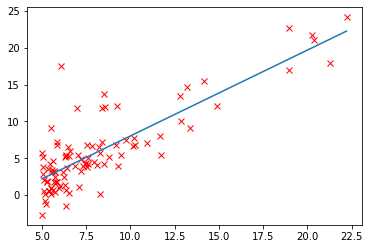

In [117]:
# Aplicamos descenso de gradiente
thetas = descenso_gradiente_vec(X, Y, alpha, m, n)

In [118]:
# Observamos los valores theta0, theta1 y su coste
print("thetas[0]: " + str(thetas[0]))
print("thetas[1]: " + str(thetas[1]))
coste = fun_coste_vec(X, Y, thetas)
print("Coste: ", coste)

thetas[0]: -3.6302914394043606
thetas[1]: 1.166362350335582
Coste:  4.483388256587726


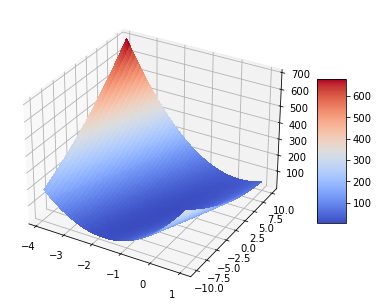

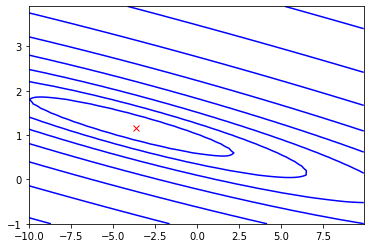

In [119]:
# Dibujamos la función de coste con un gráfico 3D y otro de rejilla
Theta0, Theta1, Coste = make_data_vec([-10, 10], [-1, 4], X, Y)

dibuja_coste(Theta0, Theta1, Coste)
dibuja_contorno(Theta0, Theta1, Coste, thetas)

## Parte 2: Regresión lineal con varias variables